In Python, time zone information comes from the third-party pytz library (installable
with pip or conda), which exposes the Olson database, a compilation of world
time zone information. This is especially important for historical data because the
daylight saving time (DST) transition dates (and even UTC offsets) have been
changed numerous times depending on the whims of local governments.

To get a time zone object from pytz, use pytz.timezone

In [22]:
import pytz
import pandas as pd
import numpy as np

In [17]:
pytz.common_timezones[250:251]

['Asia/Kolkata']

In [19]:
tz = pytz.timezone('Asia/Kolkata')

In [20]:
tz

<DstTzInfo 'Asia/Kolkata' LMT+5:53:00 STD>

In [23]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [24]:
ts

2012-03-09 09:30:00    1.151918
2012-03-10 09:30:00    0.166202
2012-03-11 09:30:00   -0.951192
2012-03-12 09:30:00    0.037022
2012-03-13 09:30:00   -2.400651
2012-03-14 09:30:00    1.000801
Freq: D, dtype: float64

The index’s tz field is None:

In [27]:
print(ts.index.tz)

None


Date ranges can be generated with a time zone set:

In [29]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D',tz='UTC')

In [30]:
rng

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [31]:
ts_utc = ts.tz_localize('UTC')

In [32]:
ts_utc

2012-03-09 09:30:00+00:00    1.151918
2012-03-10 09:30:00+00:00    0.166202
2012-03-11 09:30:00+00:00   -0.951192
2012-03-12 09:30:00+00:00    0.037022
2012-03-13 09:30:00+00:00   -2.400651
2012-03-14 09:30:00+00:00    1.000801
Freq: D, dtype: float64

Once a time series has been localized to a particular time zone, it can be converted to
another time zone with tz_convert

In [33]:
ts_utc.tz_convert('Asia/Kolkata')

2012-03-09 15:00:00+05:30    1.151918
2012-03-10 15:00:00+05:30    0.166202
2012-03-11 15:00:00+05:30   -0.951192
2012-03-12 15:00:00+05:30    0.037022
2012-03-13 15:00:00+05:30   -2.400651
2012-03-14 15:00:00+05:30    1.000801
Freq: D, dtype: float64

<b>Operations with Time Zone−Aware Timestamp Objects</b>

Similar to time series and date ranges, individual Timestamp objects similarly can be
localized from naive to time zone–aware and converted from one time zone to
another

Time zone–aware Timestamp objects internally store a UTC timestamp value as nanoseconds

In [34]:
stamp=pd.Timestamp('1999-02-21 4:00:00')

In [35]:
stamp

Timestamp('1999-02-21 04:00:00')

In [36]:
stamp_india=stamp.tz_localize('Asia/Kolkata')

In [37]:
stamp_india

Timestamp('1999-02-21 04:00:00+0530', tz='Asia/Kolkata')

In [38]:
stamp_india.tz_convert('America/New_York')

Timestamp('1999-02-20 17:30:00-0500', tz='America/New_York')

When performing time arithmetic using pandas’s DateOffset objects, pandas
respects daylight saving time transitions where possible. Here we construct timestamps
that occur right before DST transitions (forward and backward). First, 30
minutes before transitioning to DST

In [39]:
from pandas.tseries.offsets import Hour

In [41]:
stamp_india+Hour()

Timestamp('1999-02-21 05:00:00+0530', tz='Asia/Kolkata')

Operations Between Different Time Zones

If two time series with different time zones are combined, the result will be UTC.
Since the timestamps are stored under the hood in UTC, this is a straightforward
operation and requires no conversion to happen

<b>Periods and Period Arithmetic</b>

Periods represent timespans, like days, months, quarters, or years. The Period class
represents this data type, requiring a string or integer and a frequency

In [44]:
p = pd.Period(2007, freq='A-DEC')

In [45]:
p

Period('2007', 'A-DEC')

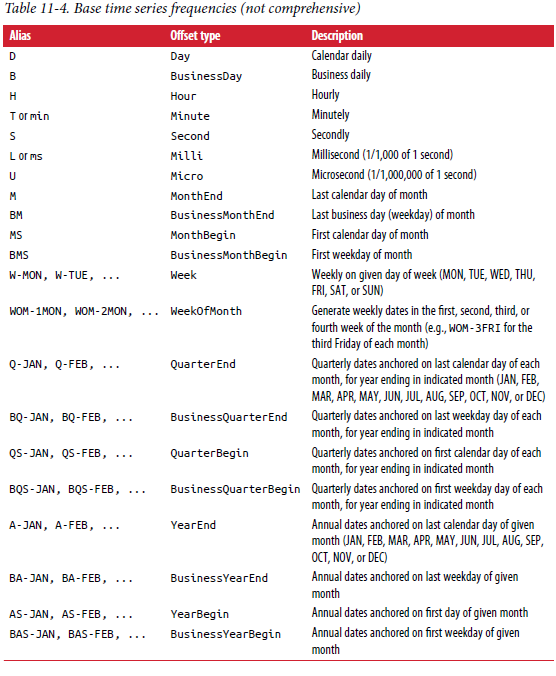

Adding and subtracting integers from
periods has the effect of shifting by their frequency:

If two periods have the same frequency, their difference is the number of units
between them

In [48]:
x=p+21
x

Period('2028', 'A-DEC')

In [49]:
x-p

<21 * YearEnds: month=12>

Regular ranges of periods can be constructed with the period_range function:

The PeriodIndex class stores a sequence of periods and can serve as an axis index in
any pandas data structure:

If you have an array of strings, you can also use the PeriodIndex class:

In [51]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [52]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.543048
2000-02    0.772916
2000-03   -0.392842
2000-04   -1.060430
2000-05    0.149516
2000-06    2.157311
Freq: M, dtype: float64

In [53]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

Period Frequency Conversion

Periods and PeriodIndex objects can be converted to another frequency with their
asfreq method

In [54]:
p = pd.Period('2007', freq='A-DEC')

In [55]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [56]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

You can think of Period('2007', 'A-DEC') as being a sort of cursor pointing to a
span of time, subdivided by monthly periods

In [58]:
p = pd.Period('Aug-2007', 'M')

In [59]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

Whole PeriodIndex objects or time series can be similarly converted with the same
semantics:

In [60]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [61]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [62]:
ts.asfreq('M', how='start')

2006-01    0.813685
2007-01    0.280676
2008-01    0.621752
2009-01    1.049996
Freq: M, dtype: float64

In [63]:
ts.asfreq('B', how='end')

2006-12-29    0.813685
2007-12-31    0.280676
2008-12-31    0.621752
2009-12-31    1.049996
Freq: B, dtype: float64

Quarterly Period Frequencies

Quarterly data is standard in accounting, finance, and other fields. Much quarterly
data is reported relative to a fiscal year end, typically the last calendar or business day
of one of the 12 months of the year

You can generate quarterly ranges using period_range

In [64]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [65]:
p

Period('2012Q4', 'Q-JAN')

In [66]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [67]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

Thus, it’s possible to do easy period arithmetic; for example, to get the timestamp at 4
PM on the second-to-last business day of the quarter, you could do:

In [68]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [69]:
p4pm

Period('2012-01-30 16:00', 'T')

In [70]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

Converting Timestamps to Periods (and Back)

Series and DataFrame objects indexed by timestamps can be converted to periods
with the to_period method:

In [75]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
print(ts)
pts = ts.to_period()

2000-01-31    0.121534
2000-02-29   -1.445531
2000-03-31   -0.124875
Freq: M, dtype: float64


In [76]:
pts

2000-01    0.121534
2000-02   -1.445531
2000-03   -0.124875
Freq: M, dtype: float64

Since periods refer to non-overlapping timespans, a timestamp can only belong to a
single period for a given frequency. While the frequency of the new PeriodIndex is
inferred from the timestamps by default, you can specify any frequency you want.

In [84]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [85]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [86]:
ts2

2000-01-29    0.662943
2000-01-30   -0.350413
2000-01-31    0.477015
2000-02-01   -0.630666
2000-02-02   -0.759566
2000-02-03   -0.440691
Freq: D, dtype: float64

In [87]:
pts2=ts2.to_period('M')
pts2

2000-01    0.662943
2000-01   -0.350413
2000-01    0.477015
2000-02   -0.630666
2000-02   -0.759566
2000-02   -0.440691
Freq: M, dtype: float64

In [88]:
pts2.to_timestamp(how='end')

2000-01-31 23:59:59.999999999    0.662943
2000-01-31 23:59:59.999999999   -0.350413
2000-01-31 23:59:59.999999999    0.477015
2000-02-29 23:59:59.999999999   -0.630666
2000-02-29 23:59:59.999999999   -0.759566
2000-02-29 23:59:59.999999999   -0.440691
dtype: float64

Creating a PeriodIndex from Arrays

Fixed frequency datasets are sometimes stored with timespan information spread
across multiple columns. For example, in this macroeconomic dataset, the year and
quarter are in different columns

By passing these arrays to PeriodIndex with a frequency, you can combine them to
form an index for the DataFrame:

index = pd.PeriodIndex(year=data.year, quarter=data.quarter,freq='Q-DEC')